# Analisi dichiarative

In [2]:
import pandas as pd
import numpy as np
import datetime

Creiamo una funzione per importare due dei file studiati nella lezione precedente

In [3]:
def ImportFile():
            
    clienti = pd.read_csv(filepath_or_buffer = r"C:\Users\ianto\Desktop\Corso python\file\Clienti.csv",
            sep = ";", 
            header = 0
            )  

    clienti["DataNascita"] =  pd.to_datetime(clienti["DataNascita"])
    
    fatture = pd.read_csv(filepath_or_buffer = r"C:\Users\ianto\Desktop\Corso python\file\Fatture.csv",
            sep = ";",  #separtore del file
            header = None,
            names = ["NumeroFattura","Tipologia","Importo","Iva","IdCliente","Regione","DataFattura","NumeroFornitore"],
            decimal = ",",
            )
    
    fatture['DataFattura'] =  pd.to_datetime(fatture['DataFattura'],
                                             format="%d/%m/%Y"
                                            )  
    
    fatture['NumeroFornitore'] = fatture['NumeroFornitore'].astype('Int64')

    return clienti,fatture

In [4]:
clienti,fatture = ImportFile()

In [5]:
fatture.head(5)

,NumeroFattura,Tipologia,Importo,Iva,IdCliente,Regione,DataFattura,NumeroFornitore
0,1,A,1120.0,20.0,1,Molise,2018-01-01,1
1,2,V,32.0,20.0,2,Puglia,2017-03-01,1
2,3,A,45.0,20.0,3,Lombardia,2017-06-01,1
3,4,V,64.0,20.0,3,Lombardia,2019-01-30,1
4,5,A,12.0,20.0,5,Umbria,2018-01-01,1


In [6]:
#Per visualizzare tutte le righe e tutte le colonne
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

# Selezionare e filtrare i dati

Estrarre le colonne NumeroClienti, Nome e regione dal dataframe Clienti. Visualizzare solo 5 righe


In [7]:
#SELECT TOP 5 NumeroCliente, Nome, Regione 
#FROM   Clienti

clienti[["NumeroCliente", "Nome", "Regione"]].head(5)

,NumeroCliente,Nome,Regione
0,1,Nicoletta,NaN
1,2,Giovanni,Lazio
2,3,Marco,Lazio
3,4,Giovanna,Lazio
4,5,Alice,Sicilia


Indicando solo il nome del dataframe vedrò tutte le colonne

In [8]:
#SELECT TOP 5 * 
#FROM   Clienti

clienti.head(5)

,NumeroCliente,Nome,DataNascita,Nazione,Regione
0,1,Nicoletta,2010-01-01,Francia,NaN
1,2,Giovanni,1976-03-01,Italia,Lazio
2,3,Marco,1980-04-01,Italia,Lazio
3,4,Giovanna,1977-05-01,Italia,Lazio
4,5,Alice,1969-06-01,Italia,Sicilia


Estrarre tutte le informazioni dei clienti della regione Lazio

In [9]:
#SELECT * 
#FROM   Clienti 
#WHERE  Regione='Lazio'

clienti[clienti["Regione"] == "Lazio"]

,NumeroCliente,Nome,DataNascita,Nazione,Regione
1,2,Giovanni,1976-03-01,Italia,Lazio
2,3,Marco,1980-04-01,Italia,Lazio
3,4,Giovanna,1977-05-01,Italia,Lazio


In [10]:
clienti.query('Regione == "Lazio"')

,NumeroCliente,Nome,DataNascita,Nazione,Regione
1,2,Giovanni,1976-03-01,Italia,Lazio
2,3,Marco,1980-04-01,Italia,Lazio
3,4,Giovanna,1977-05-01,Italia,Lazio


## Filtri con AND

Estrarre NumeroCliente e Nome dei clienti della regione Lazio che si chiamano Giovanni

In [11]:
#SELECT NumeroCliente, 
#       Nome 
#FROM   Clienti 
#WHERE  Regione='Lazio'
#   AND Nome='Giovanni

clienti[(clienti["Regione"] == "Lazio") & (clienti["Nome"] == "Giovanni")] \
       [["NumeroCliente", "Nome"]]

,NumeroCliente,Nome
1,2,Giovanni


In [12]:
clienti.query('Regione == "Lazio" and Nome == "Giovanni"') [["NumeroCliente", "Nome"]]

,NumeroCliente,Nome
1,2,Giovanni


Possiamo anche dichiarare prima il valore da cercare

In [13]:
x = "Lazio"
y = "Giovanni"

In [14]:
clienti.query('Regione == @x and Nome == @y') [["NumeroCliente", "Nome"]]

,NumeroCliente,Nome
1,2,Giovanni


## Filtri con OR

Estrarre NumeroCliente, Nome e regione dei clienti che soddisfano almeno
una delle seguenti proprietà:
1) sono della regione Lazio

2) si chiamano Giovanni

In [15]:
#SELECT TOP 5 NumeroCliente,
#       Nome,
#       Regione
#FROM   Clienti 
#WHERE  Regione='Lazio'
#    OR Nome='Giovanni

clienti.query('Regione == "Lazio" or Nome == "Giovanni"') [["NumeroCliente", "Nome", "Regione"]].head(5)

,NumeroCliente,Nome,Regione
1,2,Giovanni,Lazio
2,3,Marco,Lazio
3,4,Giovanna,Lazio
9,10,Giovanni,Toscana
14,15,Giovanni,Toscana


## Filtri con isin

Estrarre  NumeroCliente, Nome e regione dei clienti residenti nel Lazio
o nel Piemonte

In [16]:
#SELECT NumeroCliente, 
#       Nome, 
#       Regione
#FROM   Clienti 
#WHERE  Regione = 'Piemonte'
#    OR Regione='Lazio'
#oppure
#SELECT NumeroCliente, 
#       Nome, 
#       Regione
#FROM   Clienti 
#WHERE  Regione IN ('Piemonte', 'Lazio')

clienti.query('Regione in ["Piemonte","Lazio"]')[["NumeroCliente", "Nome","Regione"]]

,NumeroCliente,Nome,Regione
1,2,Giovanni,Lazio
2,3,Marco,Lazio
3,4,Giovanna,Lazio
19,20,Giovanni,Piemonte
20,22,Franca,Piemonte
21,23,Maria,Piemonte
22,24,Marina,Piemonte


## Attenzione ai tipi!

Se cerco una parola in una colonna di tipo intero, non otterrò risultati

In [17]:
clienti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   NumeroCliente  40 non-null     int64         
 1   Nome           40 non-null     object        
 2   DataNascita    40 non-null     datetime64[ns]
 3   Nazione        40 non-null     object        
 4   Regione        39 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.7+ KB


In [18]:
clienti.query("NumeroCliente == '3'")

,NumeroCliente,Nome,DataNascita,Nazione,Regione


Proviamo a convertire la colonna in stringa in un nuovo DataFrame

In [19]:
clienti2 = clienti.copy()
clienti2["NumeroCliente"] = clienti2["NumeroCliente"].astype(str)

In [20]:
clienti2.query("NumeroCliente == '3'")

,NumeroCliente,Nome,DataNascita,Nazione,Regione
2,3,Marco,1980-04-01,Italia,Lazio


Viceversa non otterrò risultati con la prossima query

In [21]:
clienti2.query("NumeroCliente == 3 ")

,NumeroCliente,Nome,DataNascita,Nazione,Regione


## Attenzione ai null! 

Null risulta diverso da Lazio (non accade lo stesso con l'SQL)

In [22]:
clienti.query("Regione != 'Lazio'").head(5)

,NumeroCliente,Nome,DataNascita,Nazione,Regione
0,1,Nicoletta,2010-01-01,Francia,NaN
4,5,Alice,1969-06-01,Italia,Sicilia
5,6,Fabrizio,1996-07-01,Italia,Sicilia
6,7,Irene,1990-08-01,Italia,Sicilia
7,8,Maria,1999-09-01,Italia,Sicilia


estrarre tutte le righe dove la regione è null

In [23]:
#SELECT *
#FROM   Clienti 
#WHERE  Regione IS NULL

clienti.query("Regione.isna()")

,NumeroCliente,Nome,DataNascita,Nazione,Regione
0,1,Nicoletta,2010-01-01,Francia,NaN


Estrarre 5 righe dove la regione non è null

In [24]:
#SELECT TOP 5 *
#FROM   Clienti 
#WHERE  Regione IS NOT NULL

clienti.query("Regione.notna()").head(5)

,NumeroCliente,Nome,DataNascita,Nazione,Regione
1,2,Giovanni,1976-03-01,Italia,Lazio
2,3,Marco,1980-04-01,Italia,Lazio
3,4,Giovanna,1977-05-01,Italia,Lazio
4,5,Alice,1969-06-01,Italia,Sicilia
5,6,Fabrizio,1996-07-01,Italia,Sicilia


## Filtri su colonne di tipo datetime

Estrarre tutte le fatture emesse dopo il 3 marzo 2018

In [25]:
fatture.dtypes

NumeroFattura               int64
Tipologia                  object
Importo                   float64
Iva                       float64
IdCliente                   int64
Regione                    object
DataFattura        datetime64[ns]
NumeroFornitore             Int64
dtype: object

In [26]:
#SQL
#SELECT *
#FROM   Fatture
#WHERE  DataFattura > '2018-03-01'

fatture.query("DataFattura > '2018-03-01'")

,NumeroFattura,Tipologia,Importo,Iva,IdCliente,Regione,DataFattura,NumeroFornitore
3,4,V,64.0,20.0,3,Lombardia,2019-01-30,1
7,8,V,54.0,20.0,8,Abruzzo,2019-01-30,2
11,12,A,57.0,20.0,7,Marche,2019-01-30,<NA>
15,16,V,21.0,20.0,1,Molise,2019-02-05,3
16,17,V,1.0,20.0,5,Umbria,2019-01-05,4


In [27]:
from datetime import datetime
data = datetime(2018,3,1)
fatture.query("DataFattura > @data")

,NumeroFattura,Tipologia,Importo,Iva,IdCliente,Regione,DataFattura,NumeroFornitore
3,4,V,64.0,20.0,3,Lombardia,2019-01-30,1
7,8,V,54.0,20.0,8,Abruzzo,2019-01-30,2
11,12,A,57.0,20.0,7,Marche,2019-01-30,<NA>
15,16,V,21.0,20.0,1,Molise,2019-02-05,3
16,17,V,1.0,20.0,5,Umbria,2019-01-05,4


## Filtri su funzioni applicate a colonne

Estrarre tutte le fatture del 2018

In [28]:
#SELECT *
#FROM   Fatture
#WHERE  YEAR(DataFattura) = 2018

fatture.query("DataFattura.dt.year == 2018")

,NumeroFattura,Tipologia,Importo,Iva,IdCliente,Regione,DataFattura,NumeroFornitore
0,1,A,1120.0,20.0,1,Molise,2018-01-01,1
4,5,A,12.0,20.0,5,Umbria,2018-01-01,1
8,9,A,67.0,20.0,3,Lombardia,2018-01-01,2
17,18,V,2.0,20.0,4,Piemonte,2018-03-01,5


In [29]:
clienti.query("Nome.str.upper() == 'NICOLA'")

,NumeroCliente,Nome,DataNascita,Nazione,Regione
16,17,Nicola,1982-06-01,Italia,Toscana


# Aggregare i dati

## Contare il numero di righe

Contare il numero di righe del dataframe Fatture

In [30]:
#SELECT COUNT(*)
#FROM   Fatture

len(fatture)

18

In [31]:
#oppure
fatture.shape[0]

18

## Calcolare indici statistici di una colonna

Calcolare la somma della colonna Importo del dataframe Fatture

In [32]:
#SELECT SUM(Importo)
#FROM   Fatture

fatture[["Importo"]].sum()

Importo    1723.0
dtype: float64

Calcolare la media della colonna Importo

In [33]:
fatture["Importo"].mean()

np.float64(95.72222222222223)

## Calcolare indici statistici su tutte le colonne

Calcolare la somma di tutte le colonne

In [34]:
fatture.max(numeric_only=True)

NumeroFattura        18.0
Importo            1120.0
Iva                  22.0
IdCliente             8.0
NumeroFornitore       5.0
dtype: Float64

Calcolare i principali indici statistici di tutte le colonne

In [35]:
fatture.describe()

,NumeroFattura,Importo,Iva,IdCliente,DataFattura,NumeroFornitore
count,18.000000,18.000000,17.000000,18.000000,18,16.0
mean,9.500000,95.722222,20.117647,3.777778,2017-11-28 21:20:00,2.1875
min,1.000000,1.000000,20.000000,1.000000,2016-01-03 00:00:00,1.0
25%,5.250000,14.250000,20.000000,2.000000,2017-06-01 00:00:00,1.0
50%,9.500000,33.000000,20.000000,3.000000,2017-11-10 12:00:00,2.0
75%,13.750000,56.250000,20.000000,5.000000,2018-10-19 12:00:00,3.0
max,18.000000,1120.000000,22.000000,8.000000,2019-02-05 00:00:00,5.0
std,5.338539,256.775893,0.485071,2.289504,NaN,1.167262


Calcolare correlazioni tra colonne numeriche di un DataFrame

In [36]:
fatture.corr(numeric_only=True)

,NumeroFattura,Importo,Iva,IdCliente,NumeroFornitore
NumeroFattura,1.000000,-0.420769,0.233741,0.043314,0.930877
Importo,-0.420769,1.000000,-0.085201,-0.294584,-0.312398
Iva,0.233741,-0.085201,1.000000,0.006740,0.201945
IdCliente,0.043314,-0.294584,0.006740,1.000000,0.074812
NumeroFornitore,0.930877,-0.312398,0.201945,0.074812,1.000000


## Aggregare su una colonna

Calcolare il numero di Fatture per ogni fornitore 

In [37]:
#SELECT   NumeroFornitore, count(*)
#FROM     Fatture
#GROUP BY NumeroFornitore;

fatture.groupby(by="NumeroFornitore",
                as_index=False, 
                dropna=False
               )["NumeroFattura"].size()

,NumeroFornitore,size
0,1,5
1,2,6
2,3,3
3,4,1
4,5,1
5,<NA>,2


Se eventualmente voglio cambiare il nome della colonna con il conteggio posso usare il metodo rename

In [38]:
fatture.groupby(by="NumeroFornitore",
                as_index=False, 
                dropna=False)["NumeroFattura"].size().rename(columns={"size":"numero_totale"})

,NumeroFornitore,numero_totale
0,1,5
1,2,6
2,3,3
3,4,1
4,5,1
5,<NA>,2


Altro metodo

In [39]:
#SELECT   NumeroFornitore, count(*)
#FROM     Fatture
#GROUP BY NumeroFornitore;

fatture.groupby(by="NumeroFornitore",
                as_index=False, 
                dropna=False) \
       .agg(conteggio   = ("NumeroFattura",
                           np.size)
            )

,NumeroFornitore,conteggio
0,1,5
1,2,6
2,3,3
3,4,1
4,5,1
5,<NA>,2


I dati raggruppati si presentano ad essere rappresentati graficamente

In [40]:
fatture.groupby(by="NumeroFornitore",
                          as_index=False, 
                          dropna=False).size() 

,NumeroFornitore,size
0,1,5
1,2,6
2,3,3
3,4,1
4,5,1
5,<NA>,2


<Axes: xlabel='NumeroFornitore'>

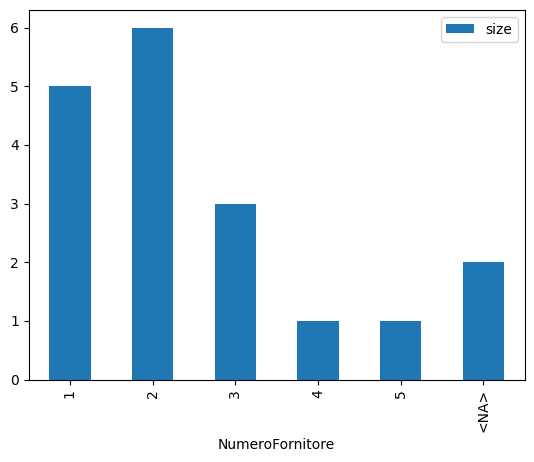

In [41]:
grafico = fatture.groupby(by="NumeroFornitore",
                          as_index=False, 
                          dropna=False).size() 

grafico.plot(x = 'NumeroFornitore',
             y = 'size',
             kind = 'bar')

## Altri esempi di aggregazione

Somma degli importi per ogni fornitore

In [42]:
fatture.groupby(by=["NumeroFornitore"], 
                as_index=False,
                dropna=False)[["Importo"]].sum()

,NumeroFornitore,Importo
0,1,1273.0
1,2,236.0
2,3,67.0
3,4,1.0
4,5,2.0
5,<NA>,144.0


Media di importi e iva per ogni fornitore

In [43]:
fatture.groupby(by=["NumeroFornitore"], 
                as_index=False, 
                dropna=False)[["Importo","Iva"]].mean().rename(columns={"Importo":"Importo_medio"})

,NumeroFornitore,Importo_medio,Iva
0,1,254.600000,20.0
1,2,39.333333,20.0
2,3,22.333333,21.0
3,4,1.000000,20.0
4,5,2.000000,20.0
5,<NA>,72.000000,20.0


Somma di importo e media di iva per ogni fornitore e cliente

In [44]:
fatture.groupby(by=["NumeroFornitore","IdCliente"], as_index=False, dropna=False).\
        agg({"Importo":"sum","Iva":"mean"}).\
        rename(columns={"Importo":"Somma importo", "Iva":"Media iva"}).head(10)

,NumeroFornitore,IdCliente,Somma importo,Media iva
0,1,1,1120.0,20.0
1,1,2,32.0,20.0
2,1,3,109.0,20.0
3,1,5,12.0,20.0
4,2,2,21.0,20.0
5,2,3,79.0,20.0
6,2,6,31.0,20.0
7,2,8,105.0,20.0
8,3,1,55.0,20.0
9,3,4,12.0,22.0


Numero di clienti univoci

In [45]:
fatture["IdCliente"].nunique()

8

Numero di clienti univoci al variare del fornitore

In [46]:
fatture.groupby(by=["NumeroFornitore"], 
                as_index=False, dropna=False)["IdCliente"].nunique()

,NumeroFornitore,IdCliente
0,1,4
1,2,4
2,3,2
3,4,1
4,5,1
5,<NA>,2


Numero di regioni presenti nel Dataframe dei clienti

In [47]:
clienti["Regione"].nunique()

7

Elenco di regioni univoche

In [48]:
clienti[["Regione"]].drop_duplicates()

,Regione
0,NaN
1,Lazio
4,Sicilia
9,Toscana
19,Piemonte
23,Lombardia
28,Puglia
33,Molise


# Combinare dataframe differenti

Riportare in un solo dataframe tutte le colonne dei dataframe Fatture e Clienti.

In [49]:
fatture.head(1)

,NumeroFattura,Tipologia,Importo,Iva,IdCliente,Regione,DataFattura,NumeroFornitore
0,1,A,1120.0,20.0,1,Molise,2018-01-01,1


In [50]:
#SELECT     TOP 5 *
#FROM       Fatture
#INNER JOIN Clienti
# ON Fatture.IdCliente = Clienti.NumeroCliente

f2 = pd.merge(fatture, 
         clienti, 
         how = 'inner',
         left_on = "IdCliente", 
         right_on = "NumeroCliente",
         suffixes = ('_fatture', '_clienti'))

In [51]:
f2.head(1)

,NumeroFattura,Tipologia,Importo,Iva,IdCliente,Regione_fatture,DataFattura,NumeroFornitore,NumeroCliente,Nome,DataNascita,Nazione,Regione_clienti
0,1,A,1120.0,20.0,1,Molise,2018-01-01,1,1,Nicoletta,2010-01-01,Francia,NaN


Esercizio: estrarre NumeroCliente e nome dei clienti senza fatture

In [52]:
#SQL
#SELECT    TOP 5 Clienti.NumeroCliente, Clienti.Nome
#FROM      Clienti
#LEFT JOIN Fatture
#       ON Clienti.NumeroCliente = Fatture.IdCliente
#WHERE F.IdCliente IS NULL

pd.merge(clienti,
         fatture,
         how = 'left',
         left_on = "NumeroCliente",
         right_on = "IdCliente").query("IdCliente.isna()")[["NumeroCliente","Nome"]].head(5)


,NumeroCliente,Nome
18,9,Grazie
19,10,Giovanni
20,11,Maria
21,12,Giuseppe
22,13,Francesco


# Ordinare un dataframe

## Ordinare un dataframe per una colonna

Visualizzare le fatture dalla più recente alla meno recente

In [53]:
#SQL
#SELECT TOP 5 *
#FROM   Fatture
#ORDER BY DataFattura DESC

fatture.sort_values(by=['Importo'], ascending=False).head(5)

,NumeroFattura,Tipologia,Importo,Iva,IdCliente,Regione,DataFattura,NumeroFornitore
0,1,A,1120.0,20.0,1,Molise,2018-01-01,1
12,13,V,87.0,20.0,2,Puglia,2016-01-03,<NA>
8,9,A,67.0,20.0,3,Lombardia,2018-01-01,2
3,4,V,64.0,20.0,3,Lombardia,2019-01-30,1
11,12,A,57.0,20.0,7,Marche,2019-01-30,<NA>


Creare un nuovo dataframe con il nuovo ordine

In [54]:
fatture_new = fatture.sort_values(by=['DataFattura'], ascending=False).copy()
fatture_new.head(5)

,NumeroFattura,Tipologia,Importo,Iva,IdCliente,Regione,DataFattura,NumeroFornitore
15,16,V,21.0,20.0,1,Molise,2019-02-05,3
7,8,V,54.0,20.0,8,Abruzzo,2019-01-30,2
3,4,V,64.0,20.0,3,Lombardia,2019-01-30,1
11,12,A,57.0,20.0,7,Marche,2019-01-30,<NA>
16,17,V,1.0,20.0,5,Umbria,2019-01-05,4


Resettiamo l'indice di FattureNew

In [55]:
fatture_new = fatture_new.reset_index(drop=True)
fatture_new.head(5)

,NumeroFattura,Tipologia,Importo,Iva,IdCliente,Regione,DataFattura,NumeroFornitore
0,16,V,21.0,20.0,1,Molise,2019-02-05,3
1,8,V,54.0,20.0,8,Abruzzo,2019-01-30,2
2,4,V,64.0,20.0,3,Lombardia,2019-01-30,1
3,12,A,57.0,20.0,7,Marche,2019-01-30,<NA>
4,17,V,1.0,20.0,5,Umbria,2019-01-05,4


## Ordinare un dataframe in maniera randomica 

Visualizzare il dataframe Fatture con un ordinamento randomico

In [56]:
fatture.sample(frac=1,
               random_state=0 #per rendere l'ordinamento ripetibile)
              ).head(5)

,NumeroFattura,Tipologia,Importo,Iva,IdCliente,Regione,DataFattura,NumeroFornitore
1,2,V,32.0,20.0,2,Puglia,2017-03-01,1
6,7,A,12.0,20.0,3,Lombardia,2017-06-01,2
8,9,A,67.0,20.0,3,Lombardia,2018-01-01,2
10,11,A,21.0,20.0,2,Puglia,2017-06-01,2
14,15,A,34.0,NaN,1,Molise,2017-06-01,3


# Modificare un dataframe

## Copiare un dataframe

Copiare il dataframe Clienti in ClientiBis

In [57]:
#SQL
#SELECT *
#INTO   ClientiBis
#FROM   Clienti

clienti_bis = clienti.copy()

## Convertire un dataframe in una lista di liste

Convertire il dataframe Clienti in una lista

In [58]:
lista_clienti = clienti.values.tolist()

In [59]:
type(lista_clienti)

list

In [60]:
lista_clienti[0:4]

[[1, 'Nicoletta', Timestamp('2010-01-01 00:00:00'), 'Francia', nan],
 [2, 'Giovanni', Timestamp('1976-03-01 00:00:00'), 'Italia', 'Lazio'],
 [3, 'Marco', Timestamp('1980-04-01 00:00:00'), 'Italia', 'Lazio'],
 [4, 'Giovanna', Timestamp('1977-05-01 00:00:00'), 'Italia', 'Lazio']]

## Convertire un dataframe in un array di numpy

Creare un array di numpy a partire dal dataframe clienti

In [61]:
array = clienti.values

In [62]:
type(array)

numpy.ndarray

In [63]:
array[0:4]

array([[1, 'Nicoletta', Timestamp('2010-01-01 00:00:00'), 'Francia', nan],
       [2, 'Giovanni', Timestamp('1976-03-01 00:00:00'), 'Italia',
        'Lazio'],
       [3, 'Marco', Timestamp('1980-04-01 00:00:00'), 'Italia', 'Lazio'],
       [4, 'Giovanna', Timestamp('1977-05-01 00:00:00'), 'Italia',
        'Lazio']], dtype=object)

## Creare un dataframe a partire da una lista

Creare un dataframe a partire da una lista, assegnando i nomi alle colonne

In [64]:
new_df = pd.DataFrame(data = lista_clienti, 
                     columns = ['NumeroCliente', 'Nome', 'Cognome', 'DataNascita', 'Regione'] )

In [65]:
new_df.dtypes

NumeroCliente             int64
Nome                     object
Cognome          datetime64[ns]
DataNascita              object
Regione                  object
dtype: object

## Rinominare una colonna 

Rinominare la colonna Iva del dataframe Fatture in Tax

In [66]:
fatture = fatture.rename(columns={"Iva": "Tax"})
fatture.head(3)

,NumeroFattura,Tipologia,Importo,Tax,IdCliente,Regione,DataFattura,NumeroFornitore
0,1,A,1120.0,20.0,1,Molise,2018-01-01,1
1,2,V,32.0,20.0,2,Puglia,2017-03-01,1
2,3,A,45.0,20.0,3,Lombardia,2017-06-01,1


## Eliminare una colonna 

Eliminare la colonna NumeroFornitore dal dataframe Fatture

In [67]:
fatture.columns

Index(['NumeroFattura', 'Tipologia', 'Importo', 'Tax', 'IdCliente', 'Regione',
       'DataFattura', 'NumeroFornitore'],
      dtype='object')

In [68]:
#SQL
#ALTER TABLE Fatture
#DROP COLUMN NumeroFornitore

fatture = fatture.drop(["NumeroFornitore"], axis=1)
#fatture.head(3)

## Aggiornare una colonna

Guardiamo i clienti della regione Lazio

In [69]:
clienti.query("Regione == 'Lazio'")

,NumeroCliente,Nome,DataNascita,Nazione,Regione
1,2,Giovanni,1976-03-01,Italia,Lazio
2,3,Marco,1980-04-01,Italia,Lazio
3,4,Giovanna,1977-05-01,Italia,Lazio


Modificare il nome di tutti i clienti della regione Lazio valorizzandolo con "Nicola"

In [70]:
#SQL
#UPDATE Clienti
#SET    Nome = 'Nicola'
#WHERE  Regione = 'Lazio'

clienti.loc[clienti["Regione"] == "Lazio", "Nome"] = 'Nicola'

In [71]:
clienti.query("Regione == 'Lazio'")

,NumeroCliente,Nome,DataNascita,Nazione,Regione
1,2,Nicola,1976-03-01,Italia,Lazio
2,3,Nicola,1980-04-01,Italia,Lazio
3,4,Nicola,1977-05-01,Italia,Lazio


In [72]:
#oppure

clienti["Nome"] = np.where(clienti["Regione"] == "Lazio", 
                           "Nicola", 
                           clienti["Nome"]  )

## Aggiornare una colonna sostituendo i null con un valore

Sostituire i null presenti nella colonna Regione del dataframe Cliente con la stringa "Non conosciuta"

In [73]:
#SQL
#UPDATE Clienti
#SET    Regione = COALESCE(Regione,'Non conosciuta')
#WHERE  Regione IS NULL

clienti["Regione"] = clienti["Regione"].fillna("Non conosciuta")

In [74]:
clienti.head(3)

,NumeroCliente,Nome,DataNascita,Nazione,Regione
0,1,Nicoletta,2010-01-01,Francia,Non conosciuta
1,2,Nicola,1976-03-01,Italia,Lazio
2,3,Nicola,1980-04-01,Italia,Lazio


## Concatenare una colonna

Concatenare le colonne Nazione e Regione del dataframe clienti.

Attenzione, in presenza di un null il risultato della concatenazione sarà null. Per evitare che ciò accada, il metodo fillna può essere usato per sostituire i null con ''.

In [75]:
clienti["ColonnaConcatenata"] = clienti["Nazione"].fillna("") + "," + clienti["Regione"].fillna("")
clienti.head(3)

,NumeroCliente,Nome,DataNascita,Nazione,Regione,ColonnaConcatenata
0,1,Nicoletta,2010-01-01,Francia,Non conosciuta,"Francia,Non conosciuta"
1,2,Nicola,1976-03-01,Italia,Lazio,"Italia,Lazio"
2,3,Nicola,1980-04-01,Italia,Lazio,"Italia,Lazio"


## Splittare una colonna

Splittare tramite la virgola la colonna appena creata in due colonne: ColonnaSplit1 e ColonnaSplit2

In [76]:
clienti[["ColonnaSplit1","ColonnaSplit2"]] = clienti["ColonnaConcatenata"].str.split(pat = ',', expand=True)
clienti.head(3)

,NumeroCliente,Nome,DataNascita,Nazione,Regione,ColonnaConcatenata,ColonnaSplit1,ColonnaSplit2
0,1,Nicoletta,2010-01-01,Francia,Non conosciuta,"Francia,Non conosciuta",Francia,Non conosciuta
1,2,Nicola,1976-03-01,Italia,Lazio,"Italia,Lazio",Italia,Lazio
2,3,Nicola,1980-04-01,Italia,Lazio,"Italia,Lazio",Italia,Lazio


## Creare una colonna in base ad una condizione

Creare nel dataframe Fatture la colonna TipologiaPrezzo contenente "Prezzo alto" se il valore della colonna Importo è maggiore di 50, "Prezzo basso" altrimenti.

In [77]:
#SQL
#CASE WHEN Importo > 50 
#     THEN 'Prezzo alto'
#     ELSE 'Prezzo basso'
#END

fatture["TipologiaPrezzo"] = np.where(fatture["Importo"] > 50, "Prezzo alto", "Prezzo basso")
fatture.head(5)

,NumeroFattura,Tipologia,Importo,Tax,IdCliente,Regione,DataFattura,TipologiaPrezzo
0,1,A,1120.0,20.0,1,Molise,2018-01-01,Prezzo alto
1,2,V,32.0,20.0,2,Puglia,2017-03-01,Prezzo basso
2,3,A,45.0,20.0,3,Lombardia,2017-06-01,Prezzo basso
3,4,V,64.0,20.0,3,Lombardia,2019-01-30,Prezzo alto
4,5,A,12.0,20.0,5,Umbria,2018-01-01,Prezzo basso


## Creare una colonna in base a più condizioni

Creare nel dataframe Fatture la colonna TipologiaPrezzo contenente:

- "Prezzo alto" se il valore della colonna Importo è maggiore di 50 

- "Prezzo medio" se è compreso tra 30(escluso) e 50(incluso)

- "Prezzo basso" se minore o uguale a 30

In [78]:
fatture["TipologiaPrezzo2"] = np.select([fatture["Importo"] > 50, 
                                         (fatture["Importo"] > 30) & (fatture["Importo"] <=50),
                                         fatture["Importo"] <= 30],
                                         ["Prezzo alto", 
                                          "Prezzo medio",
                                          "Prezzo basso"],
                                          default='Non classificato')
fatture.head(5)

,NumeroFattura,Tipologia,Importo,Tax,IdCliente,Regione,DataFattura,TipologiaPrezzo,TipologiaPrezzo2
0,1,A,1120.0,20.0,1,Molise,2018-01-01,Prezzo alto,Prezzo alto
1,2,V,32.0,20.0,2,Puglia,2017-03-01,Prezzo basso,Prezzo medio
2,3,A,45.0,20.0,3,Lombardia,2017-06-01,Prezzo basso,Prezzo medio
3,4,V,64.0,20.0,3,Lombardia,2019-01-30,Prezzo alto,Prezzo alto
4,5,A,12.0,20.0,5,Umbria,2018-01-01,Prezzo basso,Prezzo basso


## Creare colonne con porzioni di stringhe di un'altra colonna

Creare una colonna con le iniziali di nome e cognome per ogni cliente

In [79]:
#SQL
#SUBSTRING(Nome,1,1)

clienti["Iniziale"] =  clienti["Nome"].str.slice(start=0, stop =1)
clienti.head(3)

,NumeroCliente,Nome,DataNascita,Nazione,Regione,ColonnaConcatenata,ColonnaSplit1,ColonnaSplit2,Iniziale
0,1,Nicoletta,2010-01-01,Francia,Non conosciuta,"Francia,Non conosciuta",Francia,Non conosciuta,N
1,2,Nicola,1976-03-01,Italia,Lazio,"Italia,Lazio",Italia,Lazio,N
2,3,Nicola,1980-04-01,Italia,Lazio,"Italia,Lazio",Italia,Lazio,N


## Visualizzare i dati senza duplicati

Il prossimo codice visualizza le righe del DataFrame clienti senza duplicati (considerando i valori in tutte le colonne). 

ATTENZIONE! Per DataFrame con molte righe può essere un'operazione molto lunga

In [80]:
clienti.drop_duplicates().head(3)

,NumeroCliente,Nome,DataNascita,Nazione,Regione,ColonnaConcatenata,ColonnaSplit1,ColonnaSplit2,Iniziale
0,1,Nicoletta,2010-01-01,Francia,Non conosciuta,"Francia,Non conosciuta",Francia,Non conosciuta,N
1,2,Nicola,1976-03-01,Italia,Lazio,"Italia,Lazio",Italia,Lazio,N
2,3,Nicola,1980-04-01,Italia,Lazio,"Italia,Lazio",Italia,Lazio,N


Più utile è utilizzare drop_duplicates per ottenere l'elenco di valori distinti in una colonna (o combinazione di colonne)

In [81]:
#Elenco delle regioni presenti: primo metodo

clienti[["Regione"]].drop_duplicates()

,Regione
0,Non conosciuta
1,Lazio
4,Sicilia
9,Toscana
19,Piemonte
23,Lombardia
28,Puglia
33,Molise


In [82]:
#Elenco delle regioni presenti: secondo metodo

clienti.drop_duplicates(subset=["Regione"], keep = "first")

,NumeroCliente,Nome,DataNascita,Nazione,Regione,ColonnaConcatenata,ColonnaSplit1,ColonnaSplit2,Iniziale
0,1,Nicoletta,2010-01-01,Francia,Non conosciuta,"Francia,Non conosciuta",Francia,Non conosciuta,N
1,2,Nicola,1976-03-01,Italia,Lazio,"Italia,Lazio",Italia,Lazio,N
4,5,Alice,1969-06-01,Italia,Sicilia,"Italia,Sicilia",Italia,Sicilia,A
9,10,Giovanni,1971-11-01,Italia,Toscana,"Italia,Toscana",Italia,Toscana,G
19,20,Giovanni,1981-09-01,Italia,Piemonte,"Italia,Piemonte",Italia,Piemonte,G
23,25,Cristina,1991-02-01,Italia,Lombardia,"Italia,Lombardia",Italia,Lombardia,C
28,30,Seth,1967-07-01,Italia,Puglia,"Italia,Puglia",Italia,Puglia,S
33,35,Giovanni,1974-12-01,Italia,Molise,"Italia,Molise",Italia,Molise,G


In [83]:
#Proviamo a ordinare prima il DataFrame

In [85]:
clienti.sort_values(by="DataNascita",ascending=False).drop_duplicates(subset=["Regione"], keep = "first")

,NumeroCliente,Nome,DataNascita,Nazione,Regione,ColonnaConcatenata,ColonnaSplit1,ColonnaSplit2,Iniziale
0,1,Nicoletta,2010-01-01,Francia,Non conosciuta,"Francia,Non conosciuta",Francia,Non conosciuta,N
7,8,Maria,1999-09-01,Italia,Sicilia,"Italia,Sicilia",Italia,Sicilia,M
12,13,Francesco,1999-02-01,Italia,Toscana,"Italia,Toscana",Italia,Toscana,F
36,38,Mario,1994-03-01,Italia,Molise,"Italia,Molise",Italia,Molise,M
23,25,Cristina,1991-02-01,Italia,Lombardia,"Italia,Lombardia",Italia,Lombardia,C
22,24,Marina,1990-01-01,Italia,Piemonte,"Italia,Piemonte",Italia,Piemonte,M
30,32,Maria,1985-09-01,Italia,Puglia,"Italia,Puglia",Italia,Puglia,M
2,3,Nicola,1980-04-01,Italia,Lazio,"Italia,Lazio",Italia,Lazio,N


## Pivot e unpivot dei dati

Raggruppiamo i dati per cliente e tipologia

In [86]:
df = fatture.groupby(by=["IdCliente","Tipologia"], as_index=False, dropna=False)["Importo"].sum()

df

,IdCliente,Tipologia,Importo
0,1,A,1154.0
1,1,V,21.0
2,2,A,21.0
3,2,V,119.0
4,3,A,124.0
5,3,V,64.0
6,4,V,14.0
7,5,A,12.0
8,5,V,1.0
9,6,V,31.0


Modifichiamo la forma dell'output, visualizziamo una per ogni cliente due colonne per gli importi in A e V

In [87]:
df_pivot = df.pivot(columns = "Tipologia",  #da quale colonna dell'input costruire le colonne dell'output
                    index = "IdCliente",    #quale sarà l'indice del nuovo dataframe
                    values = "Importo" #cosa riportare nelle righe
                    )
df_pivot

Tipologia,A,V
IdCliente,,
1,1154.0,21.0
2,21.0,119.0
3,124.0,64.0
4,NaN,14.0
5,12.0,1.0
6,NaN,31.0
7,57.0,NaN
8,51.0,54.0


L'IdCliente è l'indice del dataframe

In [88]:
df_pivot.index

Index([1, 2, 3, 4, 5, 6, 7, 8], dtype='int64', name='IdCliente')

Rendiamolo una colonna

In [89]:
df_pivot.reset_index()

Tipologia,IdCliente,A,V
0,1,1154.0,21.0
1,2,21.0,119.0
2,3,124.0,64.0
3,4,NaN,14.0
4,5,12.0,1.0
5,6,NaN,31.0
6,7,57.0,NaN
7,8,51.0,54.0


eliminiamo il nome dell'indice

In [90]:
df_pivot = df_pivot.reset_index().rename_axis(None, axis=1)
df_pivot

,IdCliente,A,V
0,1,1154.0,21.0
1,2,21.0,119.0
2,3,124.0,64.0
3,4,NaN,14.0
4,5,12.0,1.0
5,6,NaN,31.0
6,7,57.0,NaN
7,8,51.0,54.0


Torniamo alla visualizzazione con le colonne IdCliente e Tipologia con unpivot

In [91]:
df_unpivot = pd.melt(df_pivot, 
        id_vars='IdCliente', #colonna da lasciare nell'outoput
        value_vars=list(df_pivot.columns).remove("IdCliente"), #colonne da trasformare in righe
        var_name='Tipologia', #nome della nuova colonna contenente le vecche colonne 
        value_name='Importo' #nome della nuova colonna contenente i valori
                    )

df_unpivot

,IdCliente,Tipologia,Importo
0,1,A,1154.0
1,2,A,21.0
2,3,A,124.0
3,4,A,NaN
4,5,A,12.0
5,6,A,NaN
6,7,A,57.0
7,8,A,51.0
8,1,V,21.0
9,2,V,119.0
